In [ ]:
pip install turicreate

In [222]:
import turicreate as tc
import numpy as np

In [223]:
sales = tc.SFrame('/content/drive/My Drive/home_data_small.sframe')
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900,3.0,1.0,1180.0,5650,1.0,0
6414100192,2014-12-09 00:00:00+00:00,538000,3.0,2.25,2570.0,7242,2.0,0
5631500400,2015-02-25 00:00:00+00:00,180000,2.0,1.0,770.0,10000,1.0,0
2487200875,2014-12-09 00:00:00+00:00,604000,4.0,3.0,1960.0,5000,1.0,0
1954400510,2015-02-18 00:00:00+00:00,510000,3.0,2.0,1680.0,8080,1.0,0
2008000270,2015-01-15 00:00:00+00:00,291850,3.0,1.5,1060.0,9711,1.0,0
2414600126,2015-04-15 00:00:00+00:00,229500,3.0,1.0,1780.0,7470,1.0,0
1736800520,2015-04-03 00:00:00+00:00,662500,3.0,2.5,3560.0,9796,1.0,0
9297300055,2015-01-24 00:00:00+00:00,650000,4.0,3.0,2950.0,5000,2.0,0
6865200140,2014-05-29 00:00:00+00:00,485000,4.0,1.0,1600.0,4300,1.5,0


In [224]:
def get_numpy_data(data_sframe, features, output):
    data_sframe['constant'] = 1 # this is how you add a constant column to an SFrame
    # add the column 'constant' to the front of the features list so that we can extract it along with the others:
    features = ['constant'] + features # this is how you combine two lists
    # select the columns of data_SFrame given by the features list into the SFrame features_sframe (now including constant):
    features_sframe = tc.SFrame()
    for feature in features:
      features_sframe[feature] = data_sframe[feature]
    features_sframe
    # the following line will convert the features_SFrame into a numpy matrix:
    feature_matrix = features_sframe.to_numpy()
    # assign the column of data_sframe associated with the output to the SArray output_sarray
    output_sarray = data_sframe[output]
    # the following will convert the SArray into a numpy array by first converting it to a list
    output_array = output_sarray.to_numpy()
    return(feature_matrix, output_array)

In [225]:
def normalize_features(feature_matrix):
  norms = np.linalg.norm(feature_matrix, axis=0)
  normalized_features = feature_matrix/norms
  return (normalized_features, norms)

In [226]:
(train_and_validation, test) = sales.random_split(.8, seed=1) # initial train/test split
(train, validation) = train_and_validation.random_split(.8, seed=1) # split training set into training and validation sets

Extract features and normalize

In [227]:
feature_list = ['bedrooms',  
                'bathrooms',  
                'sqft_living',  
                'sqft_lot',  
                'floors',
                'waterfront',  
                'view',  
                'condition',  
                'grade',  
                'sqft_above',  
                'sqft_basement',
                'yr_built',  
                'yr_renovated',  
                'lat',  
                'long',  
                'sqft_living15',  
                'sqft_lot15']
features_train, output_train = get_numpy_data(train, feature_list, 'price')
features_test, output_test = get_numpy_data(test, feature_list, 'price')
features_valid, output_valid = get_numpy_data(validation, feature_list, 'price')

In [228]:
features_train, norms = normalize_features(features_train) # normalize training set features (columns)
features_test = features_test / norms # normalize test set by training set norms
features_valid = features_valid / norms # normalize validation set by training set norms

In [229]:
Euclidean_distance = np.sqrt(np.sum((features_train[9] - features_test[0])**2))
Euclidean_distance


0.05972359371666126

In [230]:
def Nearest_Euclidean_distance(k,features_1,features_2):
  min = 100000000000000000
  Nearest_house = 0
  for i in range(k):
    Euclidean_distance = np.sqrt(np.sum((features_1[i] - features_2[0])**2))
    if Euclidean_distance < min:
      min < Euclidean_distance
      min = Euclidean_distance
      Nearest_house = i
  return min,Nearest_house

In [231]:
Nearest_Euclidean_distance(10,features_train,features_test)

(0.05238362784097273, 8)

In [232]:
diff =  features_train - features_test[0]

In [233]:
diff[-1].sum()

-0.0934339605841801

In [234]:
distances = np.sqrt(np.sum(diff**2, axis=1))

In [235]:
distances[100]

0.023708232449603735

In [236]:
def compute_distances(train_matrix, query_vector):
    diff = train_matrix - query_vector
    distances = np.sqrt(np.sum(diff**2, axis=1))
    return distances

In [237]:
def Nearest_Euclidean_distance_metrics(features_1,features_2):
  min = 100000000000000000
  Nearest_house = 0
  diff =  features_1 - features_2
  Euclidean_distance = np.sqrt(np.sum(diff**2, axis=1))
  for i in range(len(Euclidean_distance)):
    if Euclidean_distance[i] < min:
      min = Euclidean_distance[i]
      Nearest_house = i
  return min,Nearest_house

  
  

In [238]:
min,Nearest_house = Nearest_Euclidean_distance_metrics(features_train,features_test[2])
print(min)
print(Nearest_house)

0.002860495267507927
382


In [239]:
output_train[382]

249000

In [240]:
def compute_k_nearest_neighbors(k, features_matrix, feature_vector):
    distances = compute_distances(features_matrix, feature_vector)
    return np.argsort(distances, axis = 0)[:k]



In [241]:
compute_k_nearest_neighbors(4,features_train,features_test[2])

array([ 382, 1149, 4087, 3142])

In [242]:
def compute_k_average_nearest_neighbors(k, features_matrix,output,feature_vector):
    distances = compute_distances(features_matrix, feature_vector)
    value = np.argsort(distances, axis = 0)[:k]
    average_value = np.mean(output_train[value])
    return average_value

In [243]:
compute_k_average_nearest_neighbors(4, features_train,output_train,features_test[2])

413987.5

In [244]:
def compute_distances_k_all(k, features_matrix, output_values, feature_vector):
  num_rows = feature_vector.shape[0]
  predicted_values = []
  for i in range(num_rows):
    avg_value = compute_k_average_nearest_neighbors(k,features_matrix,output_values,features_test[i])
    predicted_values.append(avg_value)
  return predicted_values


In [245]:
predicted_values = compute_distances_k_all(10, features_train, output_train, features_test[0:10])
print(predicted_values)
print(np.min(predicted_values))

[881300.0, 431860.0, 460595.0, 430200.0, 766750.0, 667420.0, 350032.0, 512800.7, 484000.0, 457235.0]
350032.0


In [246]:
rss_all = []
for i in range(1,16):
  predictions = compute_distances_k_all(i, features_train, output_train, features_valid)
  residual = (output_valid - predictions)
  rss = sum(residual**2)
  rss_all.append(rss)
print(rss_all)
print(np.min(rss_all))

  

[355632427476622.0, 317939124951086.5, 313153111376088.5, 301621468995236.0, 294266734341982.4, 287781925015337.9, 287842561046849.3, 286179146468967.94, 281718696883431.6, 280358603702662.75, 278687700531166.9, 278744728841428.25, 275043861135800.9, 273895810640073.47, 272162684453609.75]
272162684453609.75


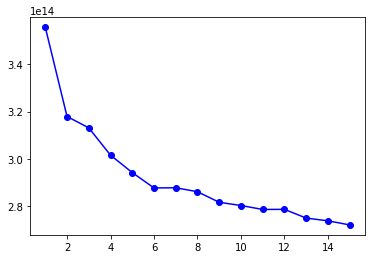

In [247]:
import matplotlib.pyplot as plt
%matplotlib inline

kvals = range(1, 16)
plt.plot(kvals, rss_all,'bo-')

In [249]:
predict_value = compute_distances_k_all(14, features_train, output_train, features_test)
residual = (output_test - predict_value)
rss = sum(residual**2)
print(rss)

133006256365677.28
